#### SHIM KYU GONG (심 규 공)

 * **1. Introduction**
 * **2. Import Libraries and Datasets**
  * 2.1 Libraries
  * 2.2 Loading Datasets
  * 2.3 Datasets 상태 체크
  * 2.4 Data 안에 빈 값 확인
 * **3. Data Cleaning(Explor) with 시각화**
  * 3.1 성별(Sex) 분석
  * 3.2 Pclasee 분석
  * 3.3 Embarked 분석
  * 3.4 Age & Fare 분석
    * 3.4.1 Age & Fare에 의한 성별(Sex) 생존자 시각화
  * 3.5 SibSp & Parch 분석
  * 3.6 탑승객 이름(Name) & 호칭(Title) 분석
 * **4. 전처리(Preprocessing)**
  * 4.1 성별 전처리 (Encode Sex)
  * 4.2 빈 요금 채우기 (Fill in missing fare)
  * 4.3 Embarked 전처리 (Encode Embarked)
  * 4.4 Pclass 전처리 (Encode Pclass)
  * 4.5 Age 전처리 (Encode Age)
  * 4.6 Family 전처리 (Encode Family)
  * 4.7 이름, 호칭 전처리 (Encode Name & Title)
 * **5. Train(학습)**
  * 5.1 Decision Tree 사용
  * 5.2 Decision Tree 시각화   
 * **6. Prediction(예측)**
 * **7. Submit(제출)**
 * **8. 확인**

## 1. Introduction

# Titanic: Machine Learning from Disaster

## 데이터분석과 머신러닝 알고리즘으로 타이타닉 해상사고의 생존자를 예측하기

캐글의 [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/)

## 2. Import Libraries and datasets

모든 데이터 분석의 시작에 필요한 라이브러리와 데이터를 읽어온다.

### 2.1  Libraries

In [71]:
# 파이썬의 import를 활용해 데이터 분석용 패키지인 Pandas를 읽어옴.
import pandas as pd
# 수학적 문제에 필요한 numpy를 import 해옴.
import numpy as np

import matplotlib
# 시각화 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
# 한글 폰트
matplotlib.rc('font', family='Malgun Gothic') 
matplotlib.rc('axes', unicode_minus=False)
# importing warnings library. 
import warnings
# Ignore warning
warnings.filterwarnings('ignore')
import os
#imporing os
print(os.listdir("C:/Users/kyugs/Desktop/titanic/input")) 

['gender_submission.csv', 'portfolio.csv', 'submission.csv', 'test.csv', 'train.csv']


* 필요한 라이브러리를 import 하고 input 폴더에 어떤 파일이 있는지 확인.

### 2.2 Loading Datasets

In [2]:
# 파이썬의 import를 활용해 데이터 분석용 패키지인 판다스(Pandas)를 읽어옵니다.
# train.csv 파일을 읽어옵니다. 여기서 PassengerId를 index로 지정해줍니다.
# (=이제 PassengerId를 통해 승객 정보를 읽어올 수 있습니다)
# 읽어온 데이터를 train이라는 이름의 변수에 할당합니다.
train = pd.read_csv("C:/Users/kyugs/Desktop/titanic/input/train.csv", index_col="PassengerId")

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# head()로 train 데이터의 상위 5개를 띄웁니다.
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# test.csv를 읽어옵니다.
# test라는 이름의 변수에 저장합니다.
test = pd.read_csv("C:/Users/kyugs/Desktop/titanic/input/test.csv", index_col="PassengerId")

# train 변수에 할당된 데이터의 행렬 사이즈를 출력.
# 마찬가지로 행렬(row, column) 사이즈를 출력.
print(test.shape)

# 전체 test 데이터에서 상위 5개만 출력.
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 2.3 Datasets 상태 체크

In [4]:
print (train.info())
print ("*"*40)
print (test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
****************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: fl

### 2.4 data안에 빈 값 확인

In [5]:
total = train.isnull().sum().sort_values(ascending = False)
percent = round(train.isnull().sum().sort_values(ascending = False)/len(train)*100, 2)
pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [6]:
total = test.isnull().sum().sort_values(ascending = False)
percent = round(test.isnull().sum().sort_values(ascending = False)/len(test)*100, 2)
pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


## 3. Data Cleaning (Explore) with 시각화

### 3.1 성별(Sex) 분석

먼저 분석할 컬럼은 성별(Sex)입니다.

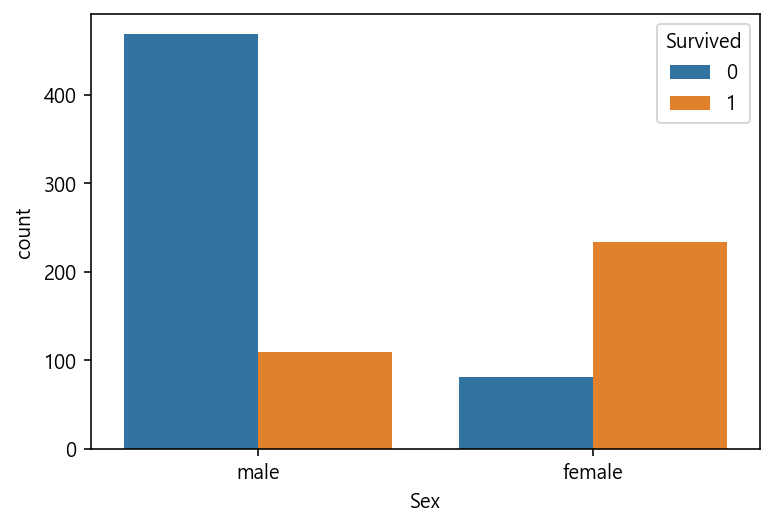

In [7]:
# 타이타닉의 train 데이터를 바탕으로 성별 컬럼을 시각화합니다.
# 크게 1) 남성 생존자, 2) 남성 사망자, 3) 여성 생존자, 4) 여성 사망자 를 시각화합니다.
sns.countplot(data=train, x="Sex", hue="Survived")

분석 결과 **여성 승객(female)이 남성 승객(male)에 비해 압도적으로 생존 확률이 높다**는 것을 파악할 수 있습니다.

In [8]:
# pivot_table을 통해 성별(Sex)에 따른 생존률을 출력.
pd.pivot_table(train, index="Sex", values="Survived") * 100

,Survived
Sex,
female,74.203822
male,18.890815


pivot table로 분석한 결과, 남자 승객의 생존률은, 18.9% 여성 승객의 생존률은 74.2%가 나온다는 것을 알 수 있습니다. 즉, 여성 승객이 남성 승객에 비해 압도적으로 생존 확률이 높다고 판단할 수 있습니다.

### 3.2 Pclass 분석

다음으로 분석할 컬럼은 객실 등급(Pclass)입니다. 객실 등급은 크게 1등급(=퍼스트 클래스), 2등급(=비즈니스), 3등급(=이코노미) 로 나뉨

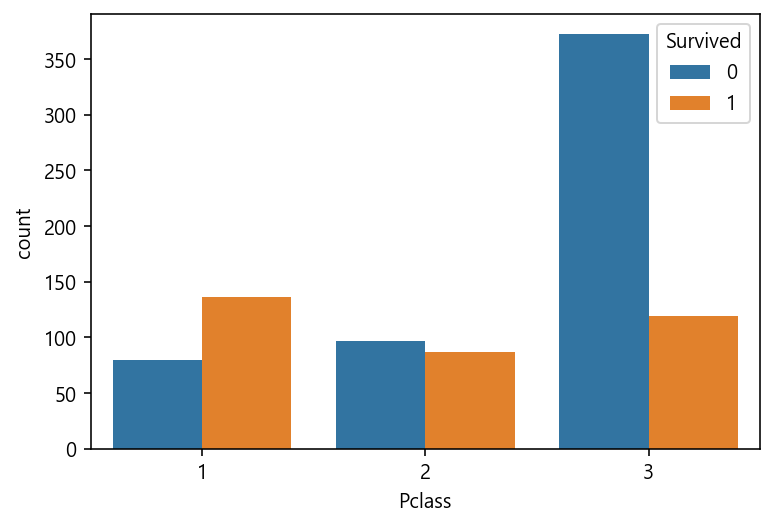

In [9]:
# 타이타닉의 train 데이터를 바탕으로 객실 등급(Pclass)을 countplot으로시각화합니다.
# 크게 1) 1등급 생존자/사망자, 2) 2등급 생존자/사망자, 3) 3등급 생존자/사망자 의 총 인원 수를 알 수 있습니다.
sns.countplot(data=train, x="Pclass", hue="Survived")

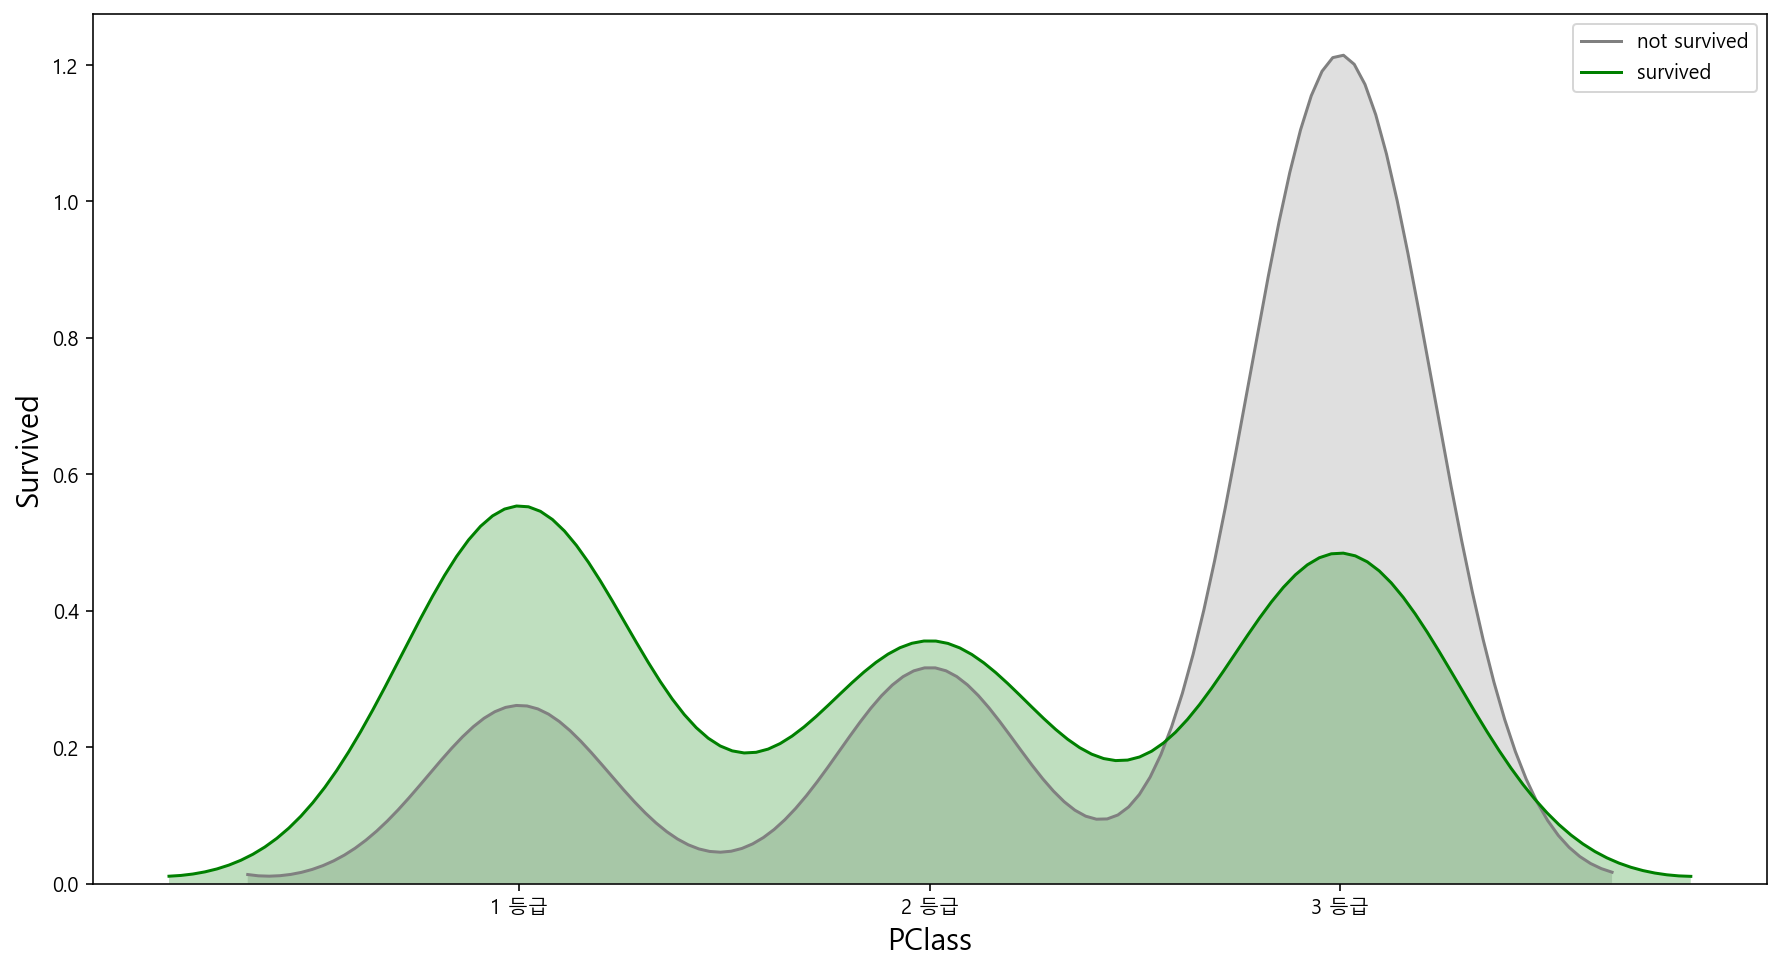

In [10]:
# Kernel Density Plot으로 시각화.
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.Pclass[train.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived')

plt.ylabel("Survived", fontsize = 15)
plt.xlabel("PClass", fontsize = 15)


labels = ['1 등급', '2 등급', '3 등급']
plt.xticks(sorted(train.Pclass.unique()), labels);

분석 결과 **객실 등급(Pclass)이 높을수록 생존 확률이 더 높다**는 것을 알 수 있습니다. 조금 더 구체적으로 살펴보자면

  * 1등급은 생존자의 인원 수가 사망자의 인원 수보다 더 많지만, 2등급과 3등급은 그렇지 않다.
  * 3등급의 경우 생존자의 인원 수보다 사망자의 인원 수가 압도적으로 높다.
  
pivot table로 객실 등급(Pclass) 컬럼 분석.

In [11]:
# pivot_table을 통해 객실 등급(Pclass)에 따른 생존률을 출력합니다.
pd.pivot_table(train, index="Pclass", values="Survived") * 100

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


분석 결과 객실 등급(Pclass)이 높을수록 생존률이 높다는 사실을 알 수 있었고, 특히나 객실 등급(Pclass)이 2등급인 경우 생존률이 1/2(50%), 3등급인 경우 생존률이 1/4(25%)도 되지 않는다는 사실을 발견할 수 있습니다.

### 3.3 Embarked 분석

선착장(Embarked) 컬럼을 분석. 선착장에는 크게 1) 셰르부르(Cherbourg, C) 2) 퀸스타운(Queenstown, Q) 3) 사우스햄튼(Southampton, S)의 세 종류가 있습니다.

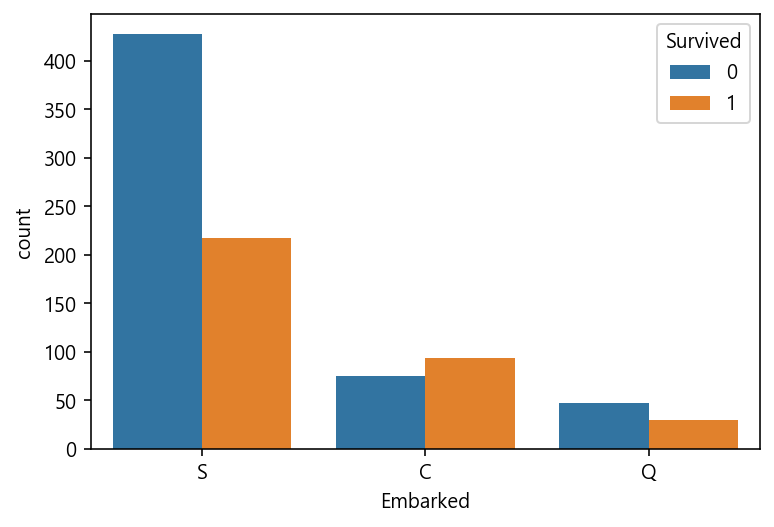

In [12]:
# 타이타닉의 train 데이터를 바탕으로 선착장(Embarked)을 시각화합니다.
# C, S, Q에서 탑승한 승객의 생존자/사망자의 총 인원수를 알 수 있습니다.
sns.countplot(data=train, x="Embarked", hue="Survived")

분석 결과 **셰르부르(Cherbourg, C)에서 탑승할수록 생존할 확률이 높으며, 사우스햄튼(Southampton, S)에서 탑승할수록 사망할 확률이 높다**는 것을 알 수 있습니다. 조금 더 구체적으로 살펴보자면

  * 사우스햄튼에서 탑승한 승객이 가장 많지만, 그만큼 많은 인원이 사망한다. 생존자의 두 배 가까운 인원이 사망하는 것으로 보인다.
  * 셰르부르에서 탑승한 인원은 사우스햄튼에 비해 상대적으로 적지만, 생존자의 인원이 사망자의 인원보다 많다.
  * 퀸스타운에서 탑승한 사람은 사망할 확률이 미세하게 높지만, 애초에 탑승객 인원이 많지 않다.
  
 pivot table로 선착장(Embarked) 컬럼을 분석.

In [13]:
# pivot_table을 통해 선착장(Embarked)에 따른 생존률을 출력합니다.
pd.pivot_table(train, index="Embarked", values="Survived") * 100

,Survived
Embarked,
C,55.357143
Q,38.961039
S,33.695652


확인 결과 셰르부르(Cherbourg, C), 퀸스타운(Queenstown, Q), 사우스햄튼(Southampton, S)에서 탑승한 승객의 생존률은 각각 55%, 38%, 33%라는 것을 알 수 있습니다.

### 3.4 Age & Fare 분석

서로 다른 데이터 시각화 방식으로 두 개의 컬럼의 상관관계를 분석해보겠습니다. 분석하고 싶은 컬럼은 나이(Age)와 운임요금(Fare) 입니다.

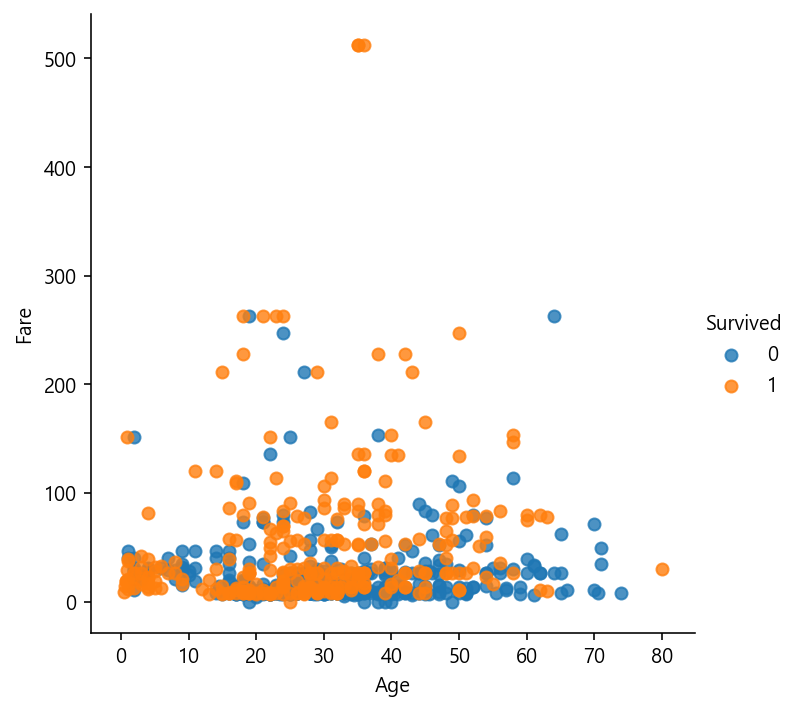

In [14]:
# lmplot을 통해 나이(Age)와 운임요금(Fare)의 상관관계를 분석합니다.
# 생존자와 사망자의 차이를 보여주기 위해 hue="Survived" 옵션을 넣습니다.
# 또한 회귀(Regression)선은 일반적으로 잘 쓰이지 않기 때문에 fit_reg에 False를 넣습니다.
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)

lmplot을 보는 방법은 간단합니다. 

  * 특정 위치에 오렌지색 점이 몰려있다면, 그 부분에 있는 승객은 생존할 확률이 높다는 것을 알 수 있고
  * 정 반대로 특정 위치에 파란색 점이 몰려있다면, 그 부분에 있는 승객은 생존 확률이 낮다는 것을 알 수 있습니다.
  
다만 아쉽게도 위 그래프에서는 특정 위치에 오렌지색 점이나 파란색 점이 몰려있지 않습니다.

그래프의 상단부(운임요금 $500 이상)에 오렌지색 점이 세 개의 동떨어진 아웃라이어(outlier)를 제거 후, 데이터 시각화를 다시 한다.

In [15]:
# 판다스의 색인(indexing) 기능을 활용하여, 운임요금(Fare)이 500달러 미만인 데이터만 가져옵니다.
# 이를 low_fare라는 변수에 할당합니다.
low_fare = train[train["Fare"] < 500]

# train 데이터와 low_fare 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
# low_fare 데이터가 train 데이터보다 3개 적은 것을 확인할 수 있는데 (891 > 888),
# 이는 low_fare에서는 $500달러 이상을 지불한 세 명의 승객을 제거했기 때문입니다.
train.shape, low_fare.shape

((891, 11), (888, 11))

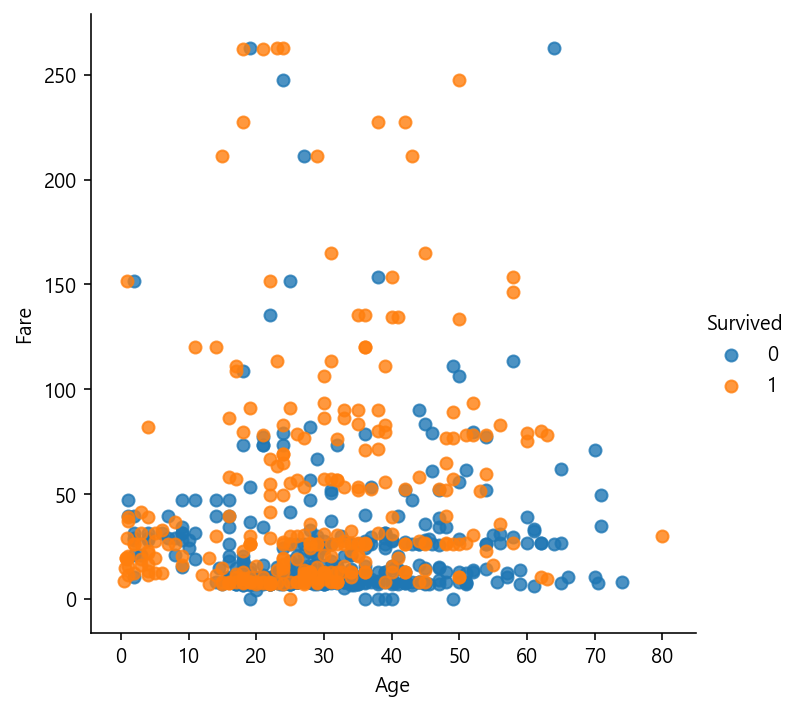

In [16]:
# lmplot을 통해 나이(Age)와 운임요금(Fare)의 상관관계를 분석합니다.
# 다만 이전과는 달리 이번에는 train 데이터가 아닌 low_fare 데이터를 시각화 합니다.
sns.lmplot(data=low_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

아웃라이어를 제거한 새로운 lmplot을 보면, 운임요금을 더 많이 낼 수록 사망자보다 생존자가 더 많아진다는 사실을 알 수 있습니다. 더 정확히 이야기하자면,

  * 50달러 이상, 100달러 이상, 200달러 이상을 기준으로 생존자와 사망자의 비율이 크게 차이나기 시작하며
  * 운임요금과 나이간의 특정한 상관관계는 보이지 않는 것 같습니다.
  
경우에 따라서는 더 많은 데이터를 아웃라이어라고 간주하고 이를 제거한 뒤 시각화를 할 수 있습니다. 가령 이번에는 운임요금이 100달러 이상인 데이터를 아웃라이어로 간주하겠습니다.

In [17]:
# 판다스의 색인(indexing) 기능을 활용하여, 운임요금(Fare)이 100달러 미만인 데이터만 가져옵니다.
# 이를 low_low_fare라는 변수에 할당합니다.
low_low_fare = train[train["Fare"] < 100]

# train, low_fare, low_low_fare 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
# low_low_fare에서는 train 데이터에 비해 무려 53명의 승객이 더 적습니다. (891 > 838)
train.shape, low_fare.shape, low_low_fare.shape

((891, 11), (888, 11), (838, 11))

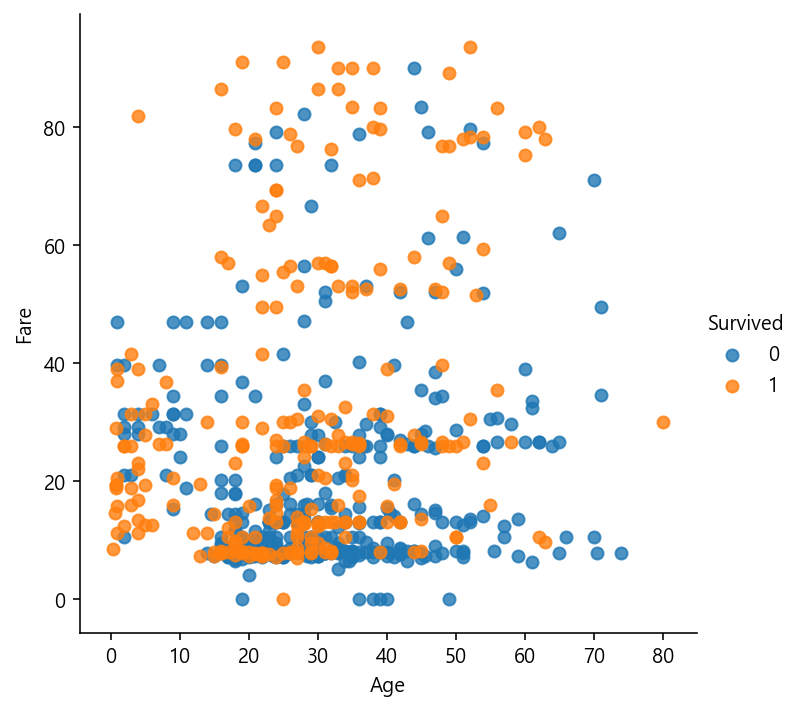

In [18]:
# lmplot을 통해 나이(Age)와 운임요금(Fare)의 상관관계를 분석합니다.
# 이번에는 low_low_fare 데이터를 시각화 합니다.
sns.lmplot(data=low_low_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

결과를 자세히 살펴보면, 나이가 15세 이하인 승객은 생존 확률이 높으며, 이 중에서도 운임요금을 20달러보다 적게 지불한 승객은 생존 확률이 확연히 높다는 것을 알 수 있습니다.

### 3.4.1 Age & Fare 에 의한 성별(Sex) 생존 시각화


위의 implot 그래프로 어느 운임 구간에 생존자가 더 높다는 걸 알 수 있었으나, 남여가 같이 표현이 되서 보기 힘들수 있기 때문에, 이번에는
남여를 따로 나누어 시각화 했습니다. 조금 더 자세히 시각적으로 생존 확률을 볼 수 있습니다. 

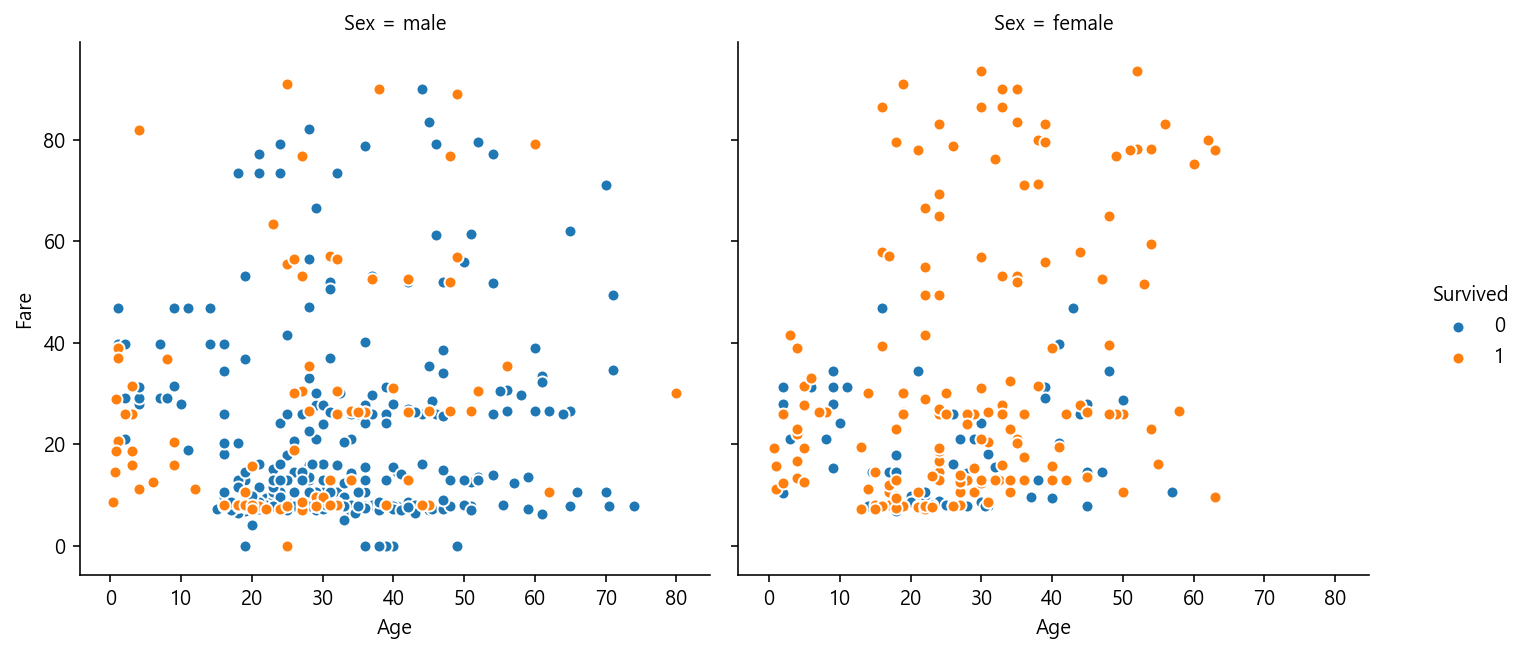

In [19]:
# FaceGrid와 scatter를 통해 나이(Age)와 운임요금(Fare)의 성별(Sex)상관관계를 시각화.
# 위에 만들어 놓은 low_low_fare 데이터를 시각화.
x = sns.FacetGrid(low_low_fare, size=5,hue="Survived", col ="Sex", 
                  margin_titles=True)
x.map(plt.scatter, "Age", "Fare",edgecolor="w").add_legend()

plt.subplots_adjust(top=0.85)

 역시 나이가 15세 이하인 승객은 생존 확률이 높으며, 이 중에서도 운임요금을 20달러보다 적게 지불한 승객은 생존 확률이 확연히 높다는 것을 알 수 있습니다.
 또한 여성 생존자들은 고액의 Fare를 지불한 탑승자의 생존률이 월등히 높다는 사실을 알 수 있습니다.

### 3.5 SibSp, Parch 분석

이번 분석 컬럼은 SibSp와 Parch입니다. 
* SibSp = "나와 함께 타이타닉호에 탑승한 형제&자매와 배우자의 총 인원 수"
* Parch = "나와 함게 타이타닉호에 탑승한 부모&자식의 총 인원 수"

SibSp와 Parch를 더하면 가족의 총 인원 수(FamilySize)가 나옵니다.

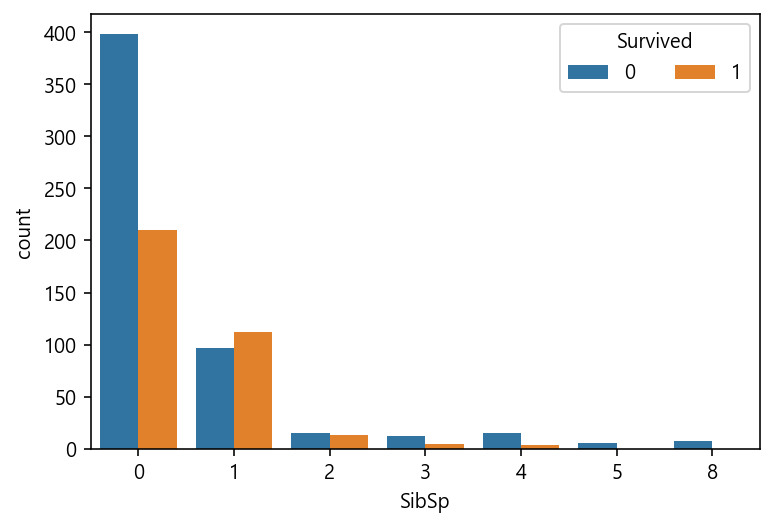

In [20]:
# 먼저 countplot이용, SibSp의 Survived 시각화 표현. 
sns.countplot(data=train, x="SibSp", hue="Survived")
plt.legend(ncol=2, loc="upper right", frameon=True, title="Survived")

* SibSp 가 1 일때 생존 확률이 제일 높은 걸 확인 할 수있다.

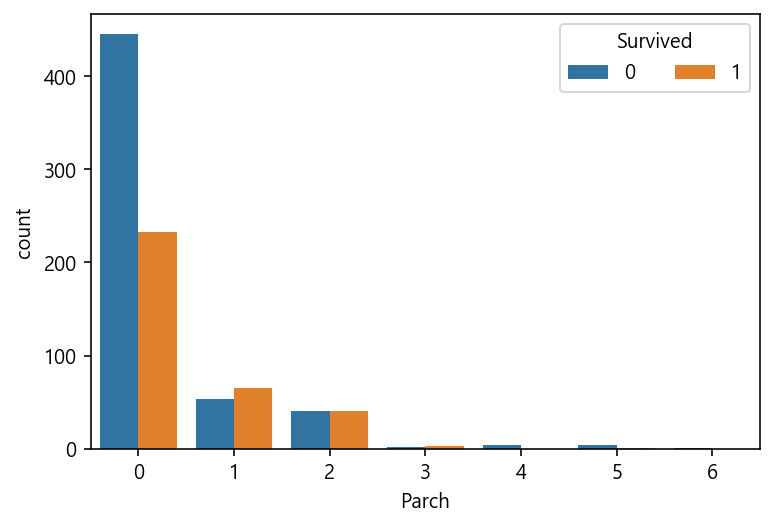

In [21]:
# countplot이용, Parch의 Survived 시각화 표현.
sns.countplot(data=train, x="Parch", hue="Survived")
plt.legend(ncol=2, loc="upper right", frameon=True, title="Survived")

* SibSp와 같이 Parch 또한 1 일때 생존 확률이 제일 높은 걸 확인 할 수있다.

하지만, 위의 SibSp과 Parch를 합치면, 다른 결과가 나오므로 합친 후, 시각화를 하면서 또 다른 정보를 얻을 수 있다.

In [22]:
# train 데이터의 SibSp와 Parch 컬럼을 더해서 FamilySize라는 새로운 컬럼을 만듭니다.
# 다만 가족 수를 셀 때는 언제나 나 자신도 포함하는데, 나 자신은 SibSp와 Parch 중 어디에도 포함되어 있지 않기 때문에,
# 무조건 1을 더해서 총 인원 수를 하나 늘려줍니다.
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# train 데이터의 상위 5개를 띄우되, SibSp와 Parch, 그리고 FamilySize 컬럼만 출력합니다.
train[["SibSp", "Parch", "FamilySize"]].head()

(891, 12)


,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1


가족 수(FamilySize)를 구했으면 이를 seaborn의 countplot으로 시각화 해보겠습니다.

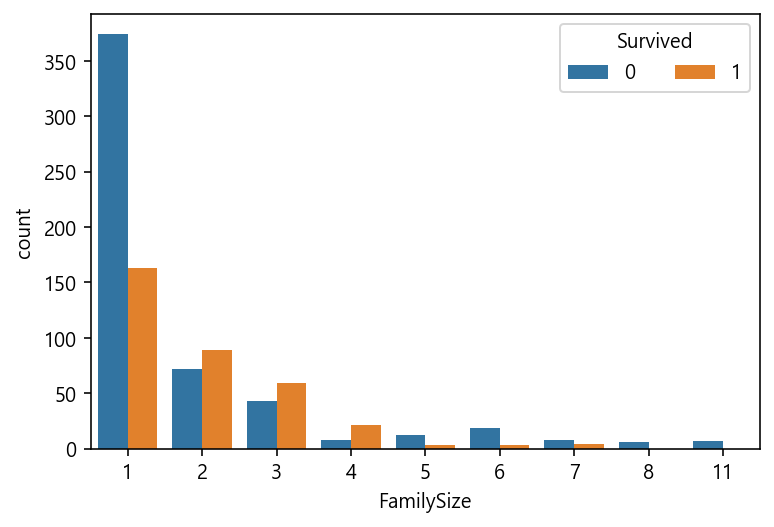

In [23]:
# trian 데이터 기반하여 countplot이용, FamilySize의 Survived 시각화 표현.
# 가족 수가 늘어날 때 마다 생존자/사망자의 변화를 볼 수 있습니다.
sns.countplot(data=train, x="FamilySize", hue="Survived")
plt.legend(ncol=2, loc="upper right", frameon=True, title="Survived")

결과를 자세히 살펴보면 다음과 같은 패턴이 있다는 것을 알 수 있습니다.

  * 타이타닉호에 혼자 탑승한 경우(FamilySize == 1) 생존 확률이 굉장히 낮습니다.
  * 타이타닉호에 적당한 인원의 가족이 함께 탑승한 경우 (2 <= FamilySize <= 4) 생존 확률이 상대적으로 높다는 것을 알 수 있습니다.
  * 하지만 타이타닉호에 탑승한 가족의 인원 수가 너무 많은 경우 (FamilySize >= 5) 생존 확률이 매우 낮다는 것을 알 수 있습니다.

FamilySize가 생존에 많은 영향을 준다는 건 확인하고 SibSp과 Parch와의 상관 관계를 heatmap으로 확인 해 볼수 있다. 

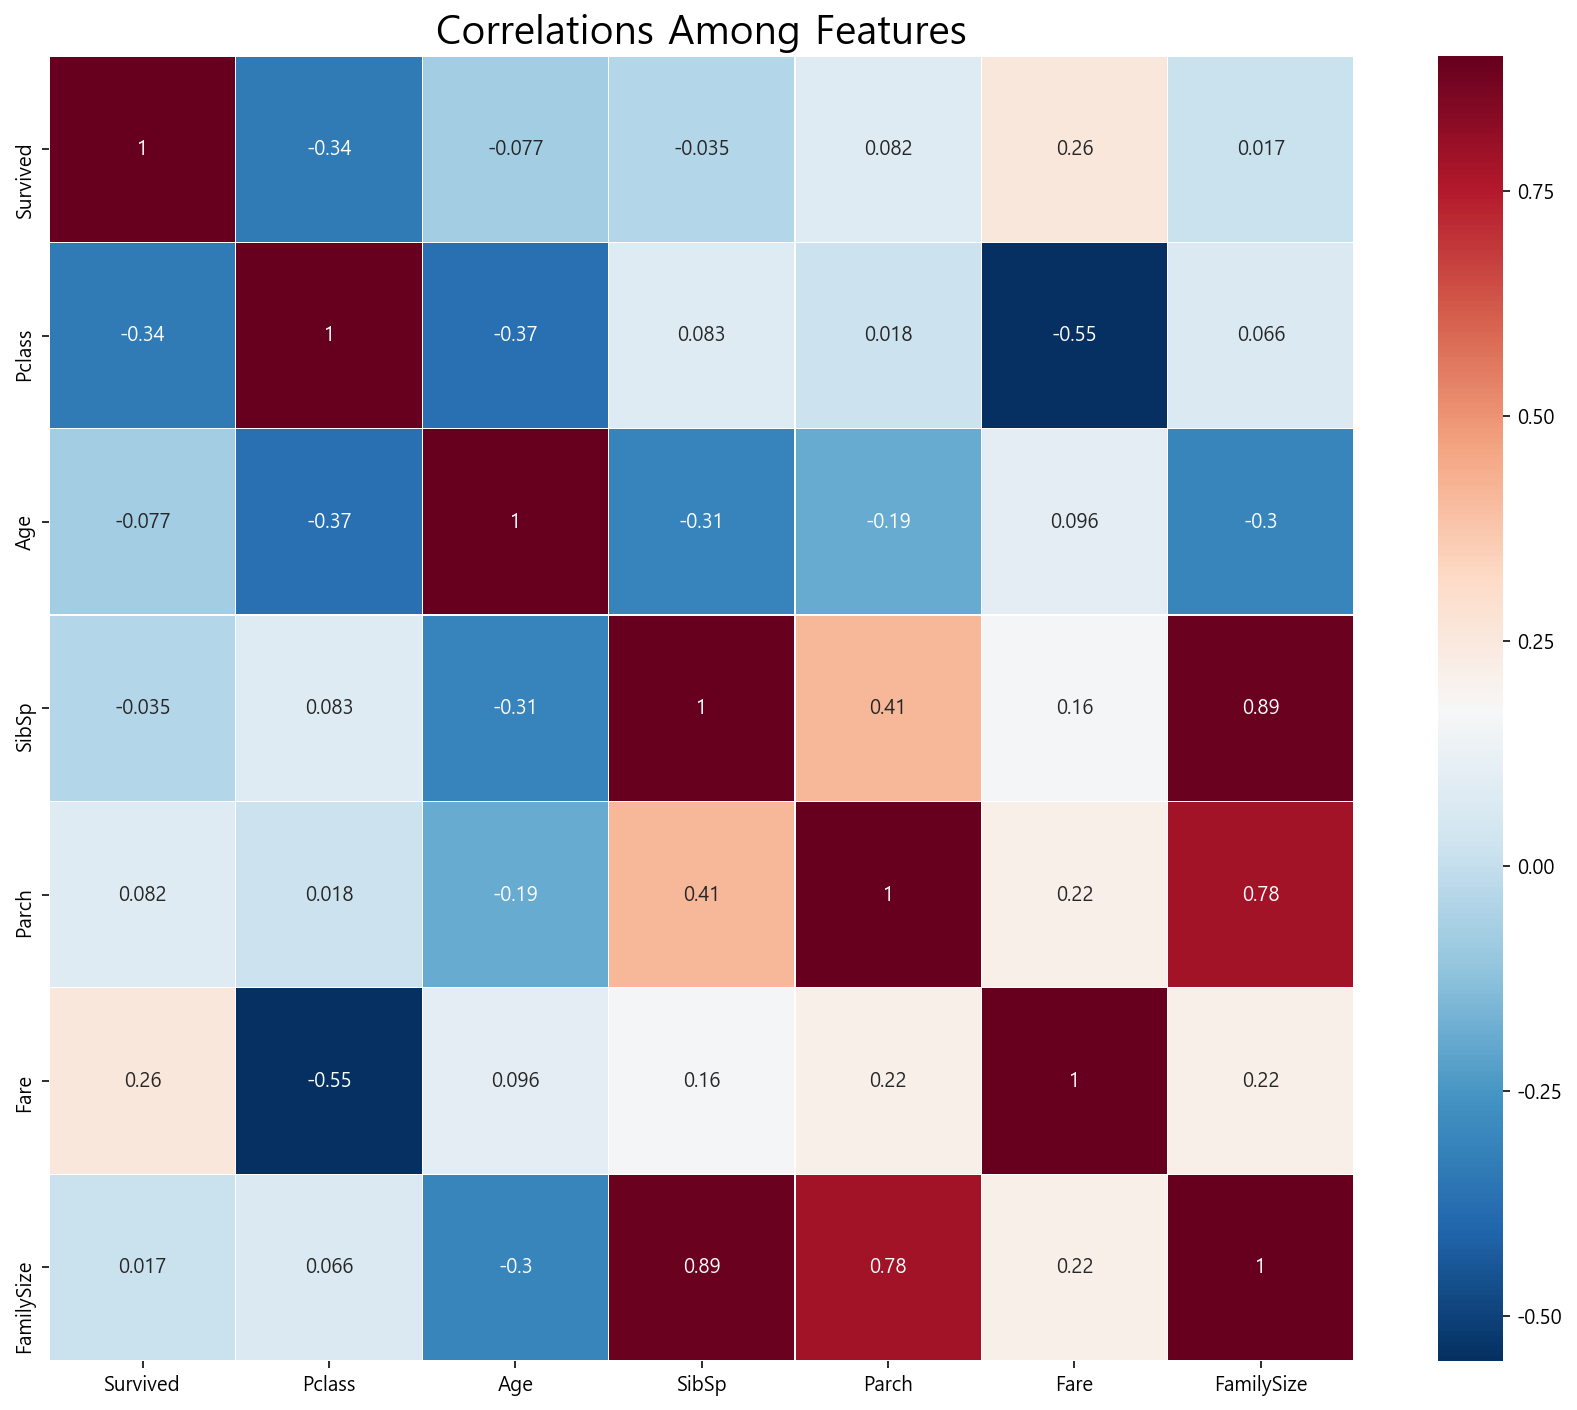

In [24]:
## heatmeap으로 서로간의 관계에 대해서 시각화, 1 로 갈수록 연관 있음.  

mask = np.zeros_like(train.corr(), dtype=np.bool)


plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20);

SibSp, Parch,와 FamilySize 가 서로간의 관계가 Survived에 많은 영향을 주고 있음을 확인 할 수 있다.

* 이번에는 FamilySize 숫자 컬럼을 구역(FamilyType)을 나눠서 countplot으로 분석하면 조금 더 명확하게 결과를 확인할 수 있습니다.

In [25]:
# 가족 수(FamilSize)가 1인 승객을 가져와서, FamilyType 컬럼에 Single 이라는 값을 넣어줍니다.
train.loc[train["FamilySize"] == 1, "FamilyType"] = "Single"

# 가족 수(FamilSize)가 2 이상 5 미만인 승객을 가져와서, FamilyType 컬럼에 Nuclear(핵가족) 이라는 값을 넣어줍니다.
train.loc[(train["FamilySize"] > 1) & (train["FamilySize"] < 5), "FamilyType"] = "Nuclear"

# 가족 수(FamilSize)가 5 이상인 승객을 가져와서, FamilyType 컬럼에 Big(대가족) 이라는 값을 넣어줍니다.
train.loc[train["FamilySize"] >= 5, "FamilyType"] = "Big"

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# train 데이터의 상위 10개를 띄우되, FamilySize와 FamilyType 컬럼만 출력합니다.
train[["FamilySize", "FamilyType"]].head(10)

(891, 13)


,FamilySize,FamilyType
PassengerId,,
1,2,Nuclear
2,2,Nuclear
3,1,Single
4,2,Nuclear
5,1,Single
6,1,Single
7,1,Single
8,5,Big
9,3,Nuclear


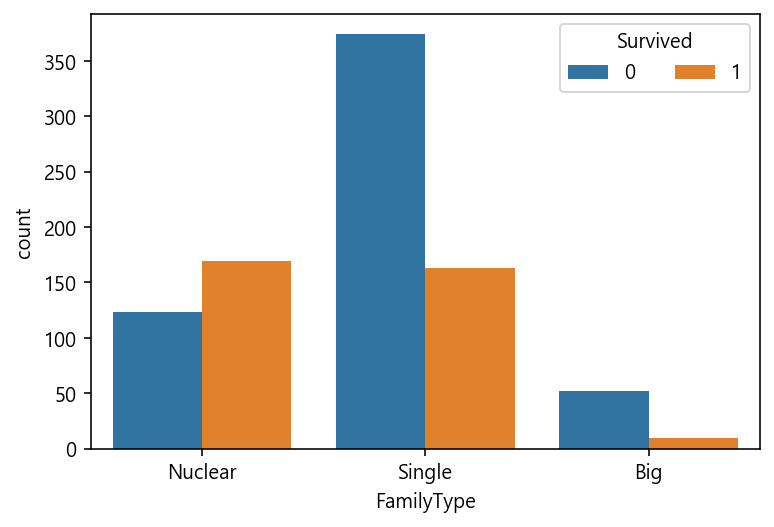

In [26]:
# trian 데이터 기반하여 countplot이용, FamilyType의 Survived 시각화 표현.
# 싱글(Single), 핵가족(Nuclear), 대가족(Big)의 생존자/사망자의 총 인원 수를 알 수 있습니다.
sns.countplot(data=train, x="FamilyType", hue="Survived")
plt.legend(ncol=2, loc="upper right", frameon=True, title="Survived")

분석 결과 핵가족(Nuclear)의 생존률이 높고, 나머지 두 타입(Single, Big)의 생존률이 확연히 낮다는 것을 알 수 있습니다.
  
pivot table로 가족 형태(FamilyType) 컬럼을 분석.

In [27]:
# pivot_table을 통해 가족 형태(FamilyType)의 변화에 따른 생존률을 출력합니다.
pd.pivot_table(data=train, index="FamilyType", values="Survived") * 100

,Survived
FamilyType,
Big,16.129032
Nuclear,57.876712
Single,30.353818


분석 결과 혼자 탑승했을 경우(Single) 생존률이 30.3%, 핵가족(Nuclear)인 경우 생존률이 57.8%, 그리고 대가족(Big)인 경우 경우 생존률이 16.1%밖에 되지 않는다는 것을 알 수 있습니다.

### 3.6 탑승객 이름(Name) & 호칭(Title) 분석

다음으로 분석할 컬럼은 승객 이름(Name)과 호칭(title)입니다. 
* 기준 : ```,```과 ```.```

  1. ```,```의 앞에 있는 부분이 성(SurName)이며,
  2. ```,```과 ```.``` 사이에 있는 부분은 승객의 호칭(Title)입니다.
  3. 마지막으로 ```.``` 뒤에 있는 부분은 이름(FirstName) 입니다.
  
가령 ```Shim, Mr. Kyu Gong``` 이라는 이름의 승객은, 1) Shim라는 성을 가진, 2) Mr라는 호칭을 가진, 3) Kyu Gong 라는 이름을 가진 승객으로 해석 가능.

In [28]:
# train 데이터의 승객 이름(Name) 컬럼의 상위 5개를 출력.
# 앞서 설명한것과 동일한 패턴으로 이름이 출력되는 것을 확인.
train["Name"].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [29]:
# get_title이라는 이름의 함수를 정의. 이 함수는 name이라는 변수를 인자로 받습니다.
# 이 함수는 이름을 받았을 때 이름에서 타이틀을 반환해줍니다.
# 가령 name에 "Shim, Mr. Kyu Gong"가 들어오면 최종 결과는 Mr를 반환해줍니다.
def get_title(name):
    # 먼저 name을 , 을 기준으로 쪼갭니다. 쪼갠 결과는 0) Braund와 1) Mr. Owen Harris가 됩니다.
    # 여기서 1)번을 가져온 뒤 다시 . 을 기준으로 쪼갭니다. 쪼갠 결과는 0) Mr와 1) Owen Harris가 됩니다.
    # 여기서 0)번을 반환합니다. 최종적으로는 Mr를 반환하게 됩니다.
    return name.split(", ")[1].split('. ')[0]

# 모든 Name 컬럼 데이터에 get_title 함수를 적용합니다.
# 그 결과에서 unique를 통해 중복된 값을 제거합니다.
train["Name"].apply(get_title).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [30]:
# 호칭을 저장하는 컬럼은 없으므로 "Title"이라는 새로운 컬럼을 만듭니다.
train["Title"] = train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
# 결혼한 여성의 Title Mrs = 1, 아니면 = 0
train['Is_Married'] = 0
train['Is_Married'].loc[train['Title'] == 'Mrs'] = 1

# Name에 "Mr"가 포함되어 있으면 Title 컬럼에 "Mr"이라는 값을 넣어줍니다.
train.loc[train["Name"].str.contains("Mr"), "Title"] = "Mr"

# Name에 "Master"가 포함되어 있으면 Title 컬럼에 "Master"이라는 값을 넣어줍니다.
train.loc[train["Name"].str.contains("Master"), "Title"] = "Master"

# Title에 여성으로 보이는 호칭은 다 Miss/Mr/Ms 로 묶음.
train["Title"] = train['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')

# Title에 남성으로 보이는 호칭은 다 'Dr/Military/Noble/Clergy' 로 묶음
train["Title"] = train['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')


print(train.shape)

# train 데이터의 상위 10개를 띄우되, Name과 Title 컬럼만 출력합니다.
train[["Name", "Title"]].head()

(891, 15)


,Name,Title
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mr
3,"Heikkinen, Miss. Laina",Miss/Mrs/Ms
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mr
5,"Allen, Mr. William Henry",Mr


Text(0.5, 1.05, '구간 나눈 후 호칭 카운트')

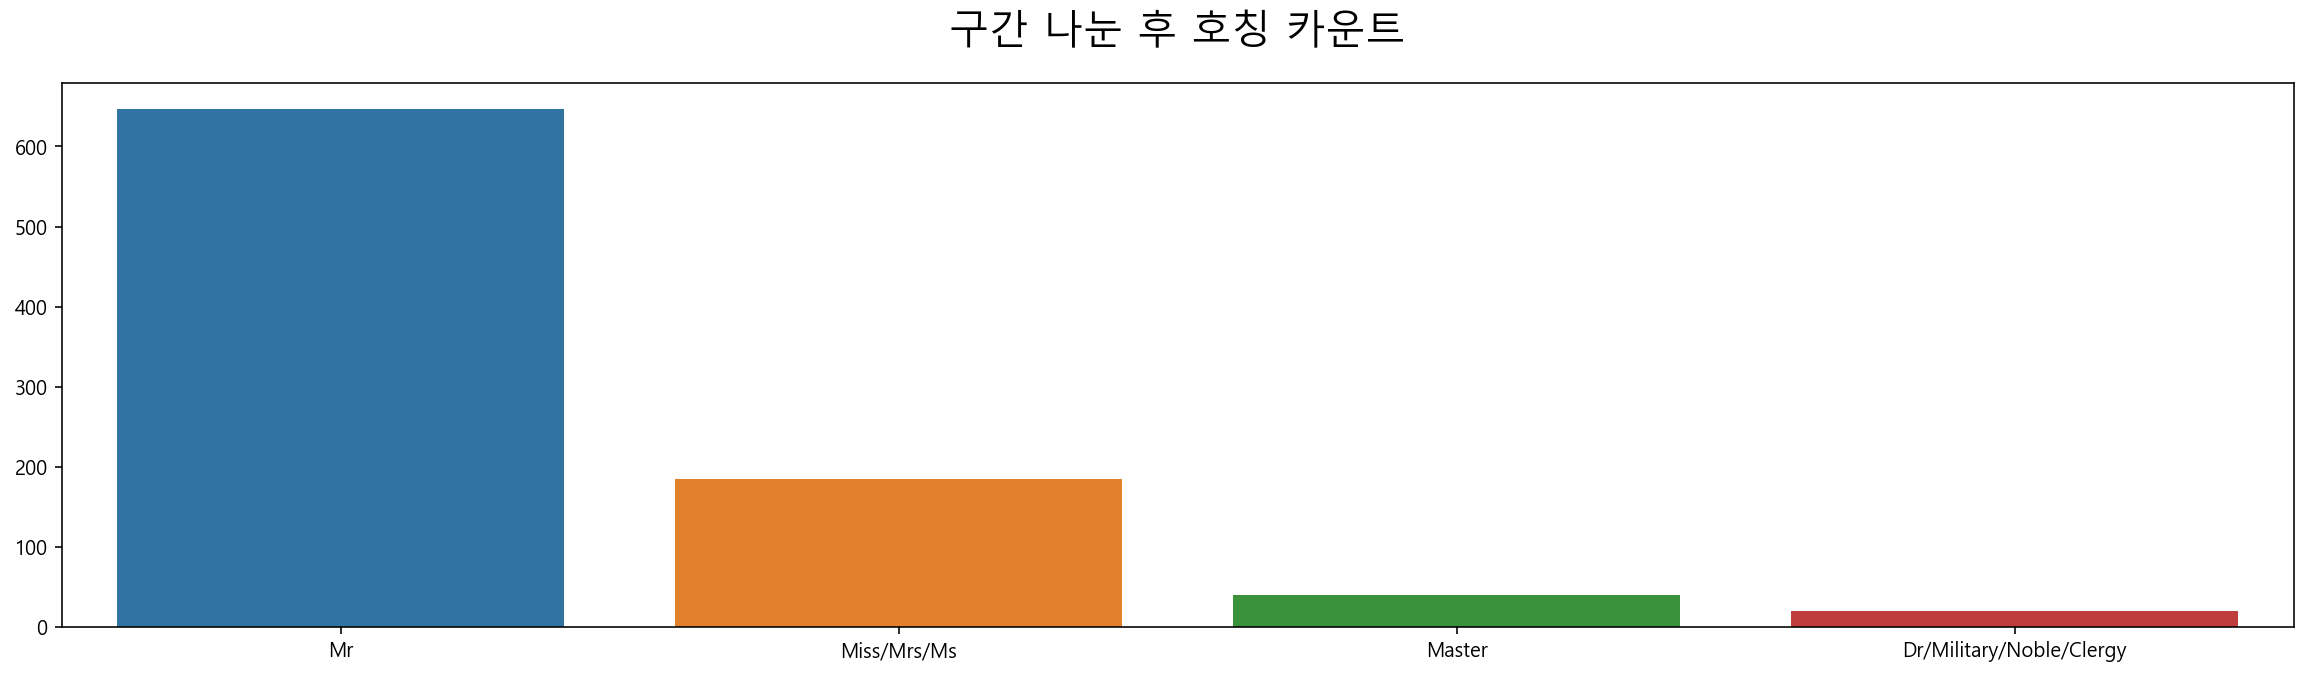

In [31]:
# 구간 나눈 호칭을 시각화
fig = plt.subplots(figsize=(20, 5))
sns.barplot(x=train['Title'].value_counts().index, 
            y=train['Title'].value_counts().values).set_title('구간 나눈 후 호칭 카운트', size=20, y=1.05)

여기에서 우리는 호칭(Title)만을 분리한 뒤, 주요 호칭별 승객의 생존률을 시각화 해보겠습니다.

타이타닉호의 승객들은 굉장히 다양한 호칭을 갖고 있습니다.  1) ```Mr```, 2) ```Miss/Mrs/Ms```, 3) ```Master```, 4) ```Dr/Military/Noble/Clergy``` 이렇게 네 가지 주요 호칭만 시각화 해보겠습니다.

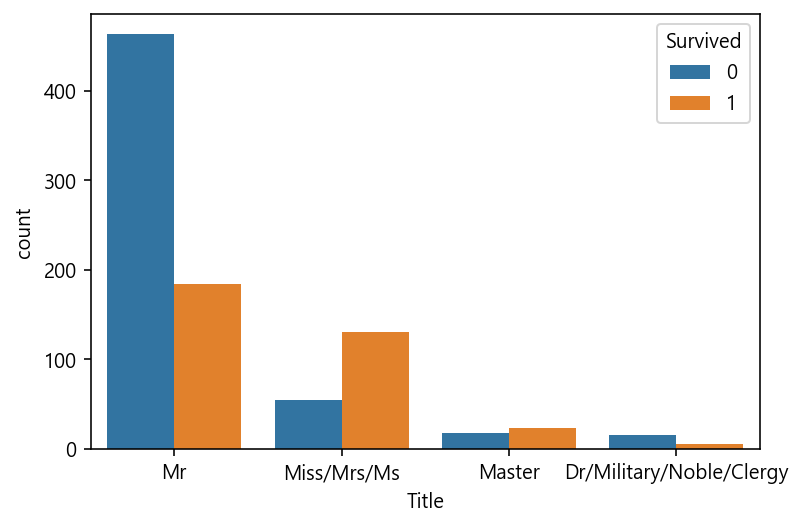

In [32]:
# 타이타닉의 train 데이터를 바탕으로 호칭(Title)을 시각화합니다.
# "Mr", "Miss/Mrs/Ms", "Master", "Dr/Military/Noble/Clergy"의 생존자/사망자의 총 인원 수를 알 수 있습니다.
sns.countplot(data=train, x="Title", hue="Survived")

분석 결과 여성(Miss/Mrs/Ms)의 성별은 우리가 이전에 분석한대로 생존률이 매우 높으며, 성인 남성(Mr)와 성인 남성으로 간주 할 수 있는(Dr/Military/Noble/Clergy)의 경우에도 우리가 이전에 분석한대로 생존률이 매우 낮다는 걸 알 수 있습니다.

여기서 눈여겨 볼 점은, 결혼하지 않은 남성(Master)입니다. 이 호칭을 보유한 사람은 남성임에도 불구하고 생존률이 상대적으로 높습니다. 그 뜻은, 호칭(Title)이 Master인 사람은 성별(Sex)이 남성(male)임에도 불구하고 생존률이 높을 것이다.라고 추측할 수 있습니다.

pivot table로 호칭(Title) 컬럼을 분석해보겠습니다.

In [33]:
# pivot_table을 통해 호칭(Title)에 따른 생존률을 출력합니다.
pd.pivot_table(train, index="Title", values="Survived") * 100

,Survived
Title,
Dr/Military/Noble/Clergy,25.000000
Master,57.500000
Miss/Mrs/Ms,70.652174
Mr,28.438949


역시 여성인 Miss/Mrs/Ms 의 생존률이 70% 넘는 것을 볼수 있습니다. 남성 중에서는 Master 가 유일하게 57%의 생존률을 확인 할 수 있습니다.

In [34]:
# test 데이터의 승객 이름(Name) 컬럼의 상위 5개를 출력.
# 앞서 설명한것과 동일한 패턴으로 이름이 출력되는 것을 확인.
test["Name"].head()

PassengerId
892                                Kelly, Mr. James
893                Wilkes, Mrs. James (Ellen Needs)
894                       Myles, Mr. Thomas Francis
895                                Wirz, Mr. Albert
896    Hirvonen, Mrs. Alexander (Helga E Lindqvist)
Name: Name, dtype: object

In [35]:
# get_title이라는 이름의 함수를 정의. 이 함수는 name이라는 변수를 인자로 받습니다.
# 이 함수는 이름을 받았을 때 이름에서 타이틀을 반환해줍니다.
# 가령 name에 "Shim, Mr. Kyu Gong"가 들어오면 최종 결과는 Mr를 반환해줍니다.
def get_title(name):
    # 먼저 name을 , 을 기준으로 쪼갭니다. 쪼갠 결과는 0) Braund와 1) Mr. Owen Harris가 됩니다.
    # 여기서 1)번을 가져온 뒤 다시 . 을 기준으로 쪼갭니다. 쪼갠 결과는 0) Mr와 1) Owen Harris가 됩니다.
    # 여기서 0)번을 반환합니다. 최종적으로는 Mr를 반환하게 됩니다.
    return name.split(", ")[1].split('. ')[0]

# 모든 Name 컬럼 데이터에 get_title 함수를 적용합니다.
# 그 결과에서 unique를 통해 중복된 값을 제거합니다.
test["Name"].apply(get_title).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [36]:
# 호칭을 저장하는 컬럼은 없으므로 "Title"이라는 새로운 컬럼을 만듭니다.
test['Title'] = test['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
# Name에 "Mr"가 포함되어 있으면 Title 컬럼에 "Mr"이라는 값을 넣어줍니다.
test.loc[test["Name"].str.contains("Mr"), "Title"] = "Mr"

# Name에 "Master"가 포함되어 있으면 Title 컬럼에 "Master"이라는 값을 넣어줍니다.
test.loc[test["Name"].str.contains("Master"), "Title"] = "Master"

# Title에 여성으로 보이는 호칭은 다 Miss/Mr/Ms 로 묶음.
test['Title'] = test['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')

# Title에 남성으로 보이는 호칭은 다 'Dr/Military/Noble/Clergy' 로 묶음
test['Title'] = test['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

# 결혼한 여성의 Title Mrs = 1, 아니면 = 0
test['Is_Married'] = 0
test['Is_Married'].loc[test['Title'] == 'Mrs'] = 1
print(test.shape)

# test 데이터의 상위 10개를 띄우되, Name과 Title 컬럼만 출력합니다.
test[["Name", "Title"]].head()

(418, 12)


,Name,Title
PassengerId,,
892,"Kelly, Mr. James",Mr
893,"Wilkes, Mrs. James (Ellen Needs)",Mr
894,"Myles, Mr. Thomas Francis",Mr
895,"Wirz, Mr. Albert",Mr
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",Mr


Text(0.5, 1.05, '구간 나눈 후 호칭 카운트')

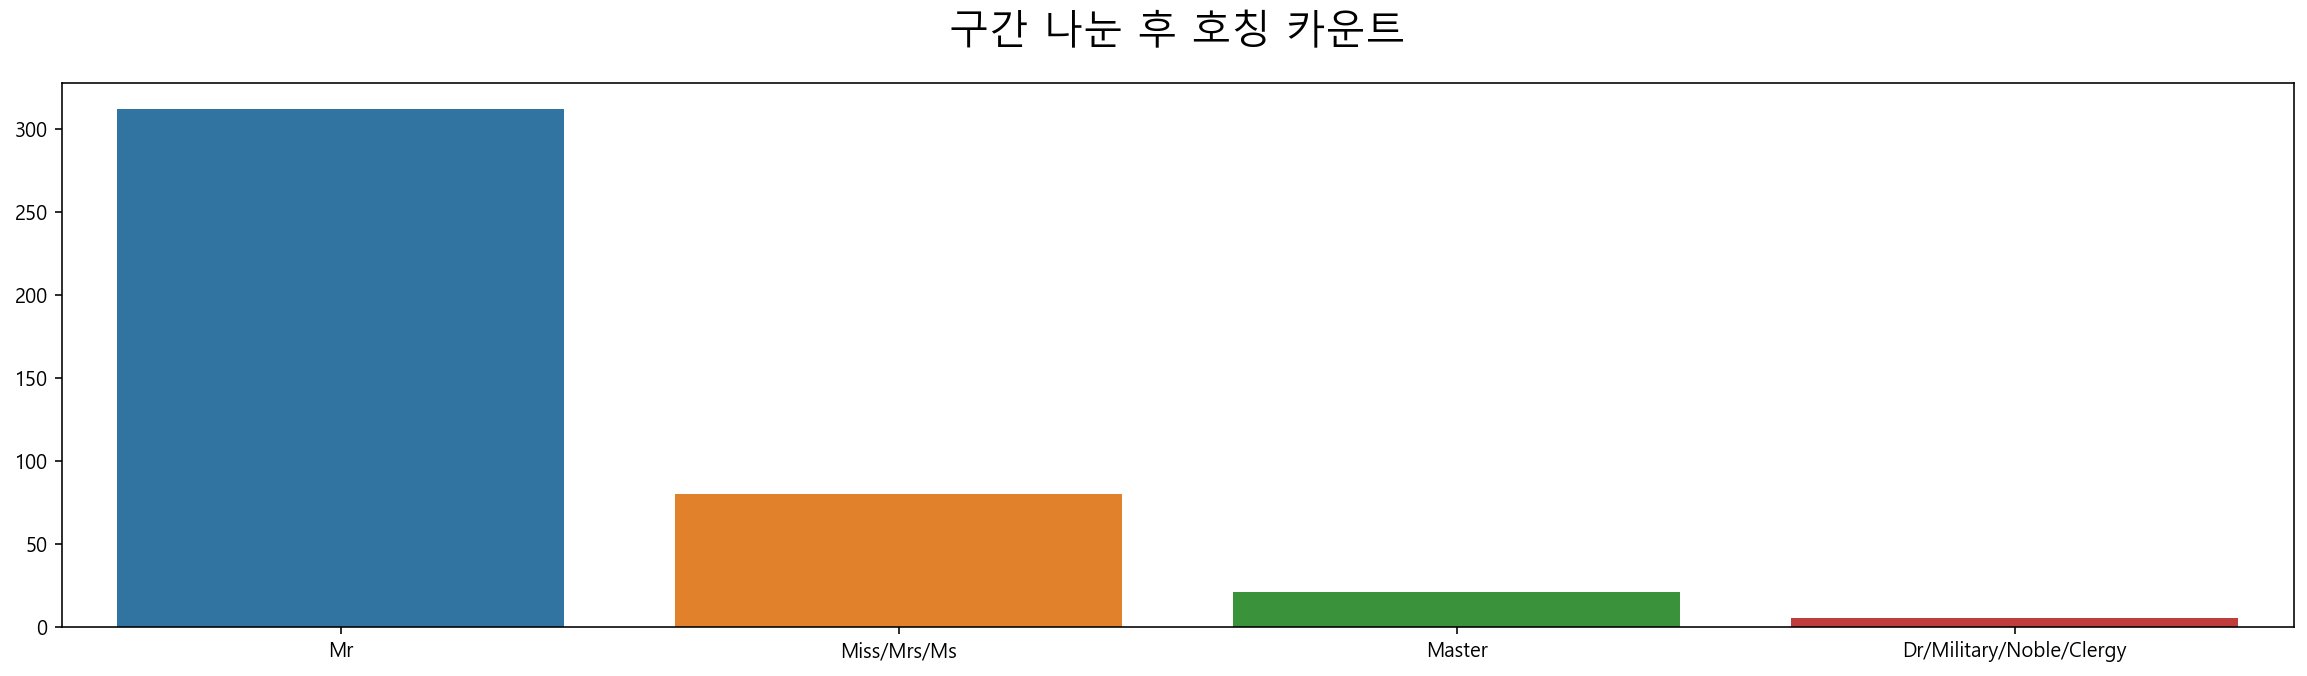

In [37]:
# 구간 나눈 호칭을 시각화
fig = plt.subplots(figsize=(20, 5))
sns.barplot(x=test['Title'].value_counts().index, 
            y=test['Title'].value_counts().values).set_title('구간 나눈 후 호칭 카운트', size=20, y=1.05)

Test 데이터에는 Survived 정보가 없으므로, pivot_table을 이용하여, Survived 확률을 볼 수는 없지만, Train 데이터를 기반으로 역시 여성 승객의 생존률이 월등히 높을 것이라고 예상 됩니다.

## 4. 전처리(Preprocessing)

test 데이터의 생존자/사망자를 예측하는 작업을 진행.

scikit-learn 머신러닝 알고리즘 사용 기본 조건:

1. 모든 데이터는 숫자(정수형, 소수점 등)로 구성되어 있어야 한다.
2. 데이터에 빈 값이 없어야 한다.

### 4.1 성별 전처리 (Encode Sex)

먼저 성별(Sex) 컬럼을 전처리 합니다.
* male = 0
* female = 1 로,
인코딩(Encoding)합니다.

In [38]:
# 성별(Sex) 값이 male인 경우 0으로, female인 경우 1로 수정합니다.
# 단 Sex 컬럼을 바로 수정하지 않고, Sex_encode라는 새로운 컬럼을 추가해서 여기에 값을 넣습니다.
# 전처리를 할 때는 언제나 이런 방식으로 원본을 유지하고 사본에다가 작업해주는게 좋습니다.
train.loc[train["Sex"] == "male", "Sex_encode"] = 0
train.loc[train["Sex"] == "female", "Sex_encode"] = 1

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# train 데이터에서 Sex 컬럼과 Sex_encode 컬럼에 대한 상위 5개의 정보를 띄웁니다.
train[["Sex", "Sex_encode"]].head()

(891, 16)


,Sex,Sex_encode
PassengerId,,
1,male,0.0
2,female,1.0
3,female,1.0
4,female,1.0
5,male,0.0


In [39]:
# train 데이터의 성별(Sex) 컬럼을 전처리해준 방식과 동일하게 test 데이터도 전처리를 해줍니다.
# 즉, Sex_encode 컬럼에 male이면 0을, female을 1을 대입해줍니다.
test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1

# test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# test 데이터에서 Sex 컬럼과 Sex_encode 컬럼에 대한 상위 5개의 정보를 띄웁니다.
test[["Sex", "Sex_encode"]].head()

(418, 13)


,Sex,Sex_encode
PassengerId,,
892,male,0.0
893,female,1.0
894,male,0.0
895,male,0.0
896,female,1.0


### 4.2 빈 운임요금 채우기(Fill in missing fare)

운임요금(Fare) 컬럼을 살펴보면, train 데이터에는 빈 값이 없지만 test 데이터에는 딱 하나 빈 값이 있다는 것을 확인할 수 있습니다.

In [40]:
# train 데이터에서 운임요금(Fare)이 비어있는 승객을 검색합니다. 검색 결과 아무런 값도 나오지 않습니다.
# 즉, train 데이터에는 운임요금(Fare)이 비어있는 승객이 한 명도 없다는 것으로 이해할 수 있습니다.
train[train["Fare"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilyType,Title,Is_Married,Sex_encode
PassengerId,,,,,,,,,,,,,,,,


In [41]:
# test 데이터에서 운임요금(Fare)이 비어있는 승객을 검색합니다.
# 검색 결과 1044번 승객(Storey, Mr. Thomas)의 운임요금(Fare) 값이 비어있다는 것을(NaN) 확인할 수 있습니다.
test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Is_Married,Sex_encode
PassengerId,,,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr,0,0.0


운임요금(Fare)이 비어있는 값을 채우는 가장 일반적인 방법은 **train 데이터의 운임요금(Fare)의 평균(mean)을 집어넣는 것입니다**. (```train["Fare"].mean()```) 하지만 전체 test 데이터중에 단 하나의 값만 비어있기 때문에, 평균이 아닌 적당한 값을 집어넣어도 정확도의 손해 없이 잘 동작할 것 같습니다.

그러므로 편리하게 test 데이터의 빈 운임요금(Fare) 값은 0으로 채우도록 하겠습니다.

In [42]:
# 앞서 성별(Sex) 컬럼을 전처리한 것과 마찬가지로,
# 원본(Fare)을 고치지 않고 사본(Fare_fillin)을 만들어 그 곳에 빈 값을 집어넣겠습니다.
train["Fare_fillin"] = train["Fare"]

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# train 데이터에서 Fare 컬럼과 Fare_fillin 컬럼에 대한 상위 5개의 정보를 띄웁니다.
train[["Fare", "Fare_fillin"]].head()

(891, 17)


,Fare,Fare_fillin
PassengerId,,
1,7.2500,7.2500
2,71.2833,71.2833
3,7.9250,7.9250
4,53.1000,53.1000
5,8.0500,8.0500


In [43]:
# train 데이터를 다룬 것과 비슷한 방식하게
# test 데이터도 사본을 만듭니다.
test["Fare_fillin"] = test["Fare"]

# test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# test 데이터에서 Fare 컬럼과 Fare_fillin 컬럼에 대한 상위 5개의 정보를 띄웁니다.
test[["Fare", "Fare_fillin"]].head()

(418, 14)


,Fare,Fare_fillin
PassengerId,,
892,7.8292,7.8292
893,7.0000,7.0000
894,9.6875,9.6875
895,8.6625,8.6625
896,12.2875,12.2875


In [44]:
# test 데이터에서 운임요금(Fare) 값이 비어있는 승객을 검색한 뒤,
# 해당 승객의 운임요금(Fare_fillin) 값을 0으로 채워줍니다.
test.loc[test["Fare"].isnull(), "Fare_fillin"] = 0

# 이후 다시 한 번 test 데이터에서 운임요금(Fare)이 비어있는 승객을 검색합니다.
# 검색 결과 1044번 승객의 운임요금의 사본(Fare_fillin)에 비어있던 값이 0으로 채워졌다는 걸 알 수 있습니다.
test.loc[test["Fare"].isnull(), ["Fare", "Fare_fillin"]]

,Fare,Fare_fillin
PassengerId,,
1044,NaN,0.0


### 4.3 Embarked 전처리 ( Encode Embarked)

선착장(Embarked)을 전처리.

선착장(Embarked)을 다음과 같이 인코딩 할 수 있습니다.

  * C == 0
  * S == 1
  * Q == 2
  
그러므로 이 경우에는, 1) C, S, Q를 숫자로 변환해주되, 2) 세 값에 특정 연산(덧셈, 뺄셈, 곱셈, 나눗셈 등)을 한다고 동일해지는 현상이 나오지 않도록 원 핫 인코딩(One Hot Encoding)을 통해 선착장(Embarked)을 인코딩 하면 다음과 같은 결과가 나옵니다.

  * C == [1, 0, 0]
  * S == [0, 1, 0]
  * Q == [0, 0, 1]

In [45]:
# 먼저 Embarked 컬럼이 C이면 True, C가 아니면 False인 색인 코드를 작성합니다.
# 그리고 여기서 나온 결과를 그대로 Embarked_C 라는 새로운 컬럼에 대입합니다.
# 이제 Embarked_C 컬럼은 승객이 C(Cherbourg)에서 탑승했으면 True, 그렇지 않으면 False가 나옵니다.
train["Embarked_C"] = train["Embarked"] == "C"

# 비슷한 방식으로 Embarked_S 컬럼을 추가합니다.
# 승객이 S(Southampton)에서 탑승했으면 True, 그렇지 않으면 False가 나옵니다.
train["Embarked_S"] = train["Embarked"] == "S"

# 비슷한 방식으로 Embarked_Q 컬럼을 추가합니다.
# 승객이 Q(Queenstown)에서 탑승했으면 True, 그렇지 않으면 False가 나옵니다.
train["Embarked_Q"] = train["Embarked"] == "Q"

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# train 데이터의 상위 5개를 띄우되, Embarked와 직접적으로 연관된 컬럼만 따로 출력합니다.
train[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(891, 20)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
1,S,False,True,False
2,C,True,False,False
3,S,False,True,False
4,S,False,True,False
5,S,False,True,False


In [46]:
# test 데이터도 train 데이터와 동일한 방식으로
# Embarked_C, Embarked_S, Embarked_Q 컬럼을 추가합니다.
test["Embarked_C"] = test["Embarked"] == "C"
test["Embarked_S"] = test["Embarked"] == "S"
test["Embarked_Q"] = test["Embarked"] == "Q"

# test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# test 데이터의 상위 5개를 띄우되, Embarked와 직접적으로 연관된 컬럼만 따로 출력합니다.
test[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(418, 17)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False


### 4.4 Pclass 전처리 ( Encode Pclass)

Pclass중에서 Pclass_1의 생존률이 62% 를 넘기 때문에 전처리를 통해서, Pclass_1, Pclass_2, Pclass_3 으로 전처리 해준다.

In [47]:
train["Pclass"].head()

PassengerId
1    3
2    1
3    3
4    1
5    3
Name: Pclass, dtype: int64

In [48]:
# 먼저 Pclass 컬럼이 1이면 True, 1이 아니면 False인 색인 코드를 작성합니다.
# 그리고 여기서 나온 결과를 그대로 Pclass_1 라는 새로운 컬럼에 대입합니다.
# 이제 Pclass_1 컬럼은 승객이 Pclass_1 면 True, 그렇지 않으면 False가 나옵니다.
train["Pclass_1"] = train["Pclass"] == 1

# 비슷한 방식으로 Pclass_2 컬럼을 추가합니다.
# 승객이 Pclass_2 면 True, 그렇지 않으면 False가 나옵니다.
train["Pclass_2"] = train["Pclass"] == 2

# 비슷한 방식으로 Pclass_3 컬럼을 추가합니다.
# 승객이 Pclass_3 면 True, 그렇지 않으면 False가 나옵니다.
train["Pclass_3"] = train["Pclass"] == 3

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# train 데이터의 상위 5개를 띄우되, Pclass와 직접적으로 연관된 컬럼만 따로 출력합니다.
train[["Pclass", "Pclass_1", "Pclass_2", "Pclass_3"]].head()

(891, 23)


,Pclass,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,
1,3,False,False,True
2,1,True,False,False
3,3,False,False,True
4,1,True,False,False
5,3,False,False,True


In [49]:
# 먼저 Pclass 컬럼이 1이면 True, 1이 아니면 False인 색인 코드를 작성합니다.
# 그리고 여기서 나온 결과를 그대로 Pclass_1 라는 새로운 컬럼에 대입합니다.
# 이제 Pclass_1 컬럼은 승객이 Pclass_1 면 True, 그렇지 않으면 False가 나옵니다.
test["Pclass_1"] = test["Pclass"] == 1

# 비슷한 방식으로 Pclass_2 컬럼을 추가합니다.
# 승객이 Pclass_2 면 True, 그렇지 않으면 False가 나옵니다.
test["Pclass_2"] = test["Pclass"] == 2

# 비슷한 방식으로 Pclass_3 컬럼을 추가합니다.
# 승객이 Pclass_3 면 True, 그렇지 않으면 False가 나옵니다.
test["Pclass_3"] = test["Pclass"] == 3

# test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# test데이터의 상위 5개를 띄우되, Pclass와 직접적으로 연관된 컬럼만 따로 출력합니다.
test[["Pclass", "Pclass_1", "Pclass_2", "Pclass_3"]].head()

(418, 20)


,Pclass,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,
892,3,False,False,True
893,3,False,False,True
894,2,False,True,False
895,3,False,False,True
896,3,False,False,True


### 4.5 Age(나이) 전처리

전처리할 컬럼은 나이(Age) 컬럼.

나이(Age) 컬럼을 그대로 넣지 않고 구역을 나눠서 대입. 구역을 나누는 기준은 앞서 데이터시각화를 통해 분석한 대로 ("나이가 15세 이하인 승객은 생존 확률이 높으며") 15세를 기준으로 나눠보겠습니다.

In [50]:
# train 데이터에 Child라는 이름의 새로운 컬럼을 추가합니다.
# 이 컬럼은 나이가 15세 미만일 경우 어린아이라고 가정하고(True), 반대로 15세 이상일 경우 어른이라고 가정합니다(False).
train["Child"] = train["Age"] < 15

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# train 데이터의 상위 10개를 띄우되, Age 컬럼과 Child 컬럼만 출력합니다.
train[["Age", "Child"]].head(10)

(891, 24)


,Age,Child
PassengerId,,
1,22.0,False
2,38.0,False
3,26.0,False
4,35.0,False
5,35.0,False
6,NaN,False
7,54.0,False
8,2.0,True
9,27.0,False


In [51]:
# test 데이터에도 train 데이터와 동일한 방식으로 Child 컬럼을 추가합니다.
test["Child"] = test["Age"] < 15

# test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# test 데이터의 상위 10개를 띄우되, Age 컬럼과 Child 컬럼만 출력합니다.
test[["Age", "Child"]].head(10)

(418, 21)


,Age,Child
PassengerId,,
892,34.5,False
893,47.0,False
894,62.0,False
895,27.0,False
896,22.0,False
897,14.0,True
898,30.0,False
899,26.0,False
900,18.0,False


### 4.6 FamilySize

나이(Age)와 같이 구역을 나누어 전처리. 

In [52]:
# train 데이터의 SibSp와 Parch 컬럼을 더해서 FamilySize라는 새로운 컬럼을 만듭니다.
# 다만 가족 수를 셀 때는 언제나 나 자신도 포함하는데, 나 자신은 SibSp와 Parch 중 어디에도 포함되어 있지 않기 때문에,
# 무조건 1을 더해서 총 인원 수를 하나 늘려줍니다.
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# train 데이터의 상위 5개를 띄우되, SibSp와 Parch, 그리고 FamilySize 컬럼만 출력합니다.
train[["SibSp", "Parch", "FamilySize"]].head()

(891, 24)


,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1


In [53]:
# test 데이터도 train 데이터와 동일한 방식으로 FamilySize 컬럼을 만듭니다.
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

# test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# test 데이터의 상위 5개를 띄우되, SibSp와 Parch, 그리고 FamilySize 컬럼만 출력합니다.
test[["SibSp", "Parch", "FamilySize"]].head()

(418, 22)


,SibSp,Parch,FamilySize
PassengerId,,,
892,0,0,1
893,1,0,2
894,0,0,1
895,0,0,1
896,1,1,3


In [54]:
# 가족 수(FamilySize) 컬럼을 활용해 세 가지 구역을 나타내는 세 개의 새로운 컬럼을 만듭니다.
# 먼저 가족 수가 1명일 경우 Single 컬럼의 값에 True를, 1명이 아닐 경우 False를 대입합니다.
train["Single"] = train["FamilySize"] == 1

# 이후 가족 수가 2에서 4명 사이일 경우 Nuclear 컬럼의 값에 True를, 그렇지 않을 경우 False를 대입합니다.
train["Nuclear"] = (train["FamilySize"] > 1) & (train["FamilySize"] < 5)

# 마지막으로 가족 수가 5명 이상일 경우 Big 컬럼의 값에 True를, 그렇지 않을 경우 False를 대입합니다.
train["Big"] = train["FamilySize"] >= 5

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# train 데이터의 상위 10개를 띄우되, FamilySize, Single, Nuclear, Big 컬럼만 출력합니다.
train[["FamilySize", "Single", "Nuclear", "Big"]].head(10)

(891, 27)


,FamilySize,Single,Nuclear,Big
PassengerId,,,,
1,2,False,True,False
2,2,False,True,False
3,1,True,False,False
4,2,False,True,False
5,1,True,False,False
6,1,True,False,False
7,1,True,False,False
8,5,False,False,True
9,3,False,True,False


In [55]:
# train 데이터를 다룬 것과 마찬가지로,
# test 데이터에도 FamilySize를 활용하여 Single, Nuclear, Big 컬럼을 새로 만듭니다.
test["Single"] = test["FamilySize"] == 1
test["Nuclear"] = (test["FamilySize"] > 1) & (test["FamilySize"] < 5)
test["Big"] = test["FamilySize"] >= 5

# test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# test 데이터의 상위 10개를 띄우되, FamilySize, Single, Nuclear, Big 컬럼만 출력합니다.
test[["FamilySize", "Single", "Nuclear", "Big"]].head(10)

(418, 25)


,FamilySize,Single,Nuclear,Big
PassengerId,,,,
892,1,True,False,False
893,2,False,True,False
894,1,True,False,False
895,1,True,False,False
896,3,False,True,False
897,1,True,False,False
898,1,True,False,False
899,3,False,True,False
900,1,True,False,False


### 4.7 탑승객 이름(Name), 호칭(Title)  전처리
1) 승객 이름(Name)에는 호칭(Title)이 포함되어 있으며, 2) 이 호칭을 분석해본 결과 "Master"(결혼하지 않은 남성)라는 호칭을 가진 승객은 남성임에도 불구하고 생존률이 높다는 것을 확인, 3) 여성 호칭의 구간을 나누어 "Miss/Mrs/Ms"으로 생존률이 가장 높은 호칭, 4) "Dr/Military/Noble/Clergy" 는 "Mr" 와 "Master" 외의 남성 호칭 구간을 나눔.

In [56]:
# 승객 이름(Name) 컬럼을 활용해 "Master"라는 새로운 컬럼을 만듭니다.
# 승객 이름(Name)에 "Master"라는 단어가 포함되어있으면 True를, 그렇지 않을 경우 False를 대입합니다.
train["Master"] = train["Name"].str.contains("Master")

# 승객 이름(Name) 컬럼을 활용해 "Mr"라는 새로운 컬럼을 만듭니다.
# 승객 이름(Name)에 "Mr"라는 단어가 포함되어있으면 True를, 그렇지 않을 경우 False를 대입합니다.
train["Mr"] = train["Name"].str.contains("Mr")

# 호칭(Title) 컬럼을 활용해 "Miss/Mrs/Ms"라는 새로운 컬럼을 만듭니다.
# 호칭(Title)에 "Miss/Mrs/Ms"라는 단어가 포함되어있으면 True를, 그렇지 않을 경우 False를 대입합니다.
train["Miss/Mrs/Ms"] = train["Title"].str.contains("Miss/Mrs/Ms")

# 호칭(Title) 컬럼을 활용해 "Dr/Military/Noble/Clergy"라는 새로운 컬럼을 만듭니다.
# 호칭(Title)에 "Dr/Military/Noble/Clergy"라는 단어가 포함되어있으면 True를, 그렇지 않을 경우 False를 대입합니다.
train["Dr/Military/Noble/Clergy"] = train["Title"].str.contains("Dr/Military/Noble/Clergy")

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# train 데이터의 상위 10개를 띄우되, "Name", "Master", "Mr", "Miss/Mrs/Ms", "Dr/Military/Noble/Clergy" 컬럼만 출력합니다.
train[["Name", "Master", "Mr", "Miss/Mrs/Ms", "Dr/Military/Noble/Clergy"]].head()

(891, 31)


,Name,Master,Mr,Miss/Mrs/Ms,Dr/Military/Noble/Clergy
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",False,True,False,False
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",False,True,False,False
3,"Heikkinen, Miss. Laina",False,False,True,False
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False,True,False,False
5,"Allen, Mr. William Henry",False,True,False,False


In [57]:
# train 데이터를 다룬 것과 마찬가지로,
# 승객 이름(Name) 컬럼을 활용해 "Master"라는 새로운 컬럼을 만듭니다.
# 승객 이름(Name)에 "Master"라는 단어가 포함되어있으면 True를, 그렇지 않을 경우 False를 대입합니다.
test["Master"] = test["Name"].str.contains("Master")

# 승객 이름(Name) 컬럼을 활용해 "Mr"라는 새로운 컬럼을 만듭니다.
# 승객 이름(Name)에 "Mr"라는 단어가 포함되어있으면 True를, 그렇지 않을 경우 False를 대입합니다.
test["Mr"] = test["Name"].str.contains("Mr")

# 호칭(Title) 컬럼을 활용해 "Miss/Mrs/Ms"라는 새로운 컬럼을 만듭니다.
# 호칭(Title)에 "Miss/Mrs/Ms"라는 단어가 포함되어있으면 True를, 그렇지 않을 경우 False를 대입합니다.
test["Miss/Mrs/Ms"] = test["Title"].str.contains("Miss/Mrs/Ms")

# 호칭(Title) 컬럼을 활용해 "Dr/Military/Noble/Clergy"라는 새로운 컬럼을 만듭니다.
# 호칭(Title)에 "Dr/Military/Noble/Clergy"라는 단어가 포함되어있으면 True를, 그렇지 않을 경우 False를 대입합니다.
test["Dr/Military/Noble/Clergy"] = test["Title"].str.contains("Dr/Military/Noble/Clergy")

# test변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# test 데이터의 상위 10개를 띄우되, "Name", "Master", "Mr", "Miss/Mrs/Ms", "Dr/Military/Noble/Clergy" 컬럼만 출력합니다.
test[["Name", "Master", "Mr", "Miss/Mrs/Ms", "Dr/Military/Noble/Clergy"]].head(10)

(418, 29)


,Name,Master,Mr,Miss/Mrs/Ms,Dr/Military/Noble/Clergy
PassengerId,,,,,
892,"Kelly, Mr. James",False,True,False,False
893,"Wilkes, Mrs. James (Ellen Needs)",False,True,False,False
894,"Myles, Mr. Thomas Francis",False,True,False,False
895,"Wirz, Mr. Albert",False,True,False,False
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",False,True,False,False
897,"Svensson, Mr. Johan Cervin",False,True,False,False
898,"Connolly, Miss. Kate",False,False,True,False
899,"Caldwell, Mr. Albert Francis",False,True,False,False
900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",False,True,False,False


In [58]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Pclass_2,Pclass_3,Child,Single,Nuclear,Big,Master,Mr,Miss/Mrs/Ms,Dr/Military/Noble/Clergy
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,False,True,False,False,True,False,False,True,False,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,False,False,False,False,True,False,False,True,False,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,False,True,False,True,False,False,False,False,True,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,False,False,False,False,True,False,False,True,False,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,False,True,False,True,False,False,False,True,False,False


## 5. Train(학습)

전처리(preprocessing)한 데이터를 활용해 Decision Tree를 학습(train)시키기.


이번 코드에서 다음의 컬럼을 Feature와 Label로 활용.

  * **Feature**: 1) 티켓 등급(Pclass), 2) 성별(Sex_encode), 3) 운임요금(Fare_fillin), 그리고 4) 선착장(Embarked)을 사용.
  * **Label**: 생존 여부(Survived)를 사용.
  
이를 통해 train 데이터와 test 데이터를 다음의 세 가지 형태의 값으로 나눌 것입니다.

  * **X_train**: train 데이터의 feature 입니다. 줄여서 X_train이라고 부릅니다.
  * **y_train**: train 데이터의 label 입니다. 마찬가지로 줄여서 y_train이라고 부릅니다.
  * **X_test**: test 데이터의 feature 입니다. 마찬가지로 줄여서 X_test라고 부릅니다.
  
 위 3개의 데이터로 **y_test** 즉 test 데이터의 Survived를 예측 가능.

In [59]:
# 1) 티켓 등급(Pclass), 2) 성별(Sex_encode), 3) 운임요금(Fare_fillin), 4) 선착장(Embarked) 이렇게 네 가지를 feature로 지정합니다.
# 여기서 선착장(Embarked)은 one hot encoding하였기 때문에, Embarked 자체 컬럼이 아닌 Embarked_C, Embarked_S, Embarked_Q 세 개의 컬럼을 사용하겠습니다.
# 그러므로 feature에 해당하는 컬럼의 갯수는 총 여섯 개입니다. 이 여섯 개의 컬럼명을 feature_names라는 이름의 파이썬 리스트(list)로 만들어 변수에 할당합니다.
feature_names = ["Pclass","Sex_encode", "Fare_fillin",
                 "Embarked_C", "Embarked_S","Embarked_Q",
                 "Child", "Nuclear",
                 "Master", "Miss/Mrs/Ms", "Is_Married"]
feature_names

['Pclass',
 'Sex_encode',
 'Fare_fillin',
 'Embarked_C',
 'Embarked_S',
 'Embarked_Q',
 'Child',
 'Nuclear',
 'Master',
 'Miss/Mrs/Ms',
 'Is_Married']

In [60]:
# 생존 여부(Survived)를 label로 지정합니다.
# Survived라는 이름의 컬럼을 label_name 이라는 이름의 변수에 할당합니다.
label_name = "Survived"
label_name

'Survived'

In [61]:
# feature_names를 활용해 train 데이터의 feature를 가져옵니다.
# 이를 X_train이라는 이름의 변수에 할당합니다.
X_train = train[feature_names]

# X_train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(X_train.shape)

# X_train 데이터의 상위 5개를 띄웁니다.
X_train.head()

(891, 11)


,Pclass,Sex_encode,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q,Child,Nuclear,Master,Miss/Mrs/Ms,Is_Married
PassengerId,,,,,,,,,,,
1,3,0.0,7.2500,False,True,False,False,True,False,False,0
2,1,1.0,71.2833,True,False,False,False,True,False,False,1
3,3,1.0,7.9250,False,True,False,False,False,False,True,0
4,1,1.0,53.1000,False,True,False,False,True,False,False,1
5,3,0.0,8.0500,False,True,False,False,False,False,False,0


In [62]:
# feature_names를 활용해 test 데이터의 feature를 가져옵니다.
# 이를 X_test라는 이름의 변수에 할당합니다.
X_test = test[feature_names]

# X_test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(X_test.shape)

# X_test 데이터의 상위 5개를 띄웁니다.
X_test.head()

(418, 11)


,Pclass,Sex_encode,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q,Child,Nuclear,Master,Miss/Mrs/Ms,Is_Married
PassengerId,,,,,,,,,,,
892,3,0.0,7.8292,False,False,True,False,False,False,False,0
893,3,1.0,7.0000,False,True,False,False,True,False,False,0
894,2,0.0,9.6875,False,False,True,False,False,False,False,0
895,3,0.0,8.6625,False,True,False,False,False,False,False,0
896,3,1.0,12.2875,False,True,False,False,True,False,False,0


In [63]:
# label_name을 활용해 train 데이터의 label을 가져옵니다.
# 이를 y_train이라는 이름의 변수에 할당합니다.
y_train = train[label_name]

# y_train 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(y_train.shape)

# y_train 데이터의 상위 5개를 띄웁니다.
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

### 5.1 Decision Tree 사용

X_train, X_test, y_train 데이터를 만들었으면, Decision Tree 학습.

scikit-learn에 있는 머신러닝 알고리즘에는 크게 두 가지 기능에 적용 시켜 사용.


  * **fit**: 머신러닝 알고리즘을 학습시킵니다. 전문용어로 fitting한다고 하기 때문에 fit이라는 표현을 사용합니다. fit을 하기 위해서는 train 데이터가 필요하며, 정확히는 train 데이터의 feature(X_train)와 label(y_train)이 필요합니다.
  * **predict**: **fit**이 끝나면, 이후에 **predict**를 통해 예측을 할 수 있습니다. predict를 하기 위해서는 test 데이터가 필요하며, 정확히는 test 데이터의 feature(X_test)가 필요합니다.

In [64]:
# sklearn의 tree 모듈에서 DecisionTreeClassifier를 가져옵니다.
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifier를 생성하는데, 트리의 최대 깊이(depth)를 7로 설정합니다.
# 이렇게 하면 트리의 가지(branch)가 8 depth 아래로 내려가지 않습니다.
# 또한 생성한 DecisionTreeClassifier를 model이라는 이름의 변수에 할당합니다.
model = DecisionTreeClassifier(max_depth=8, random_state=0)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [65]:
# DecisionTreeClassifier를 학습(fitting)합니다.
# 학습에는 fit 이라는 기능을 사용하며, train 데이터의 feature(X_train)와 label(y_train)을 집어넣습니다.
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

### 5.2 Decision Tree 시각화

Decision Tree의 학습이 끝나면 시각화함으로써 학습 확인.

학습을 위해서는 Graphviz 사용.

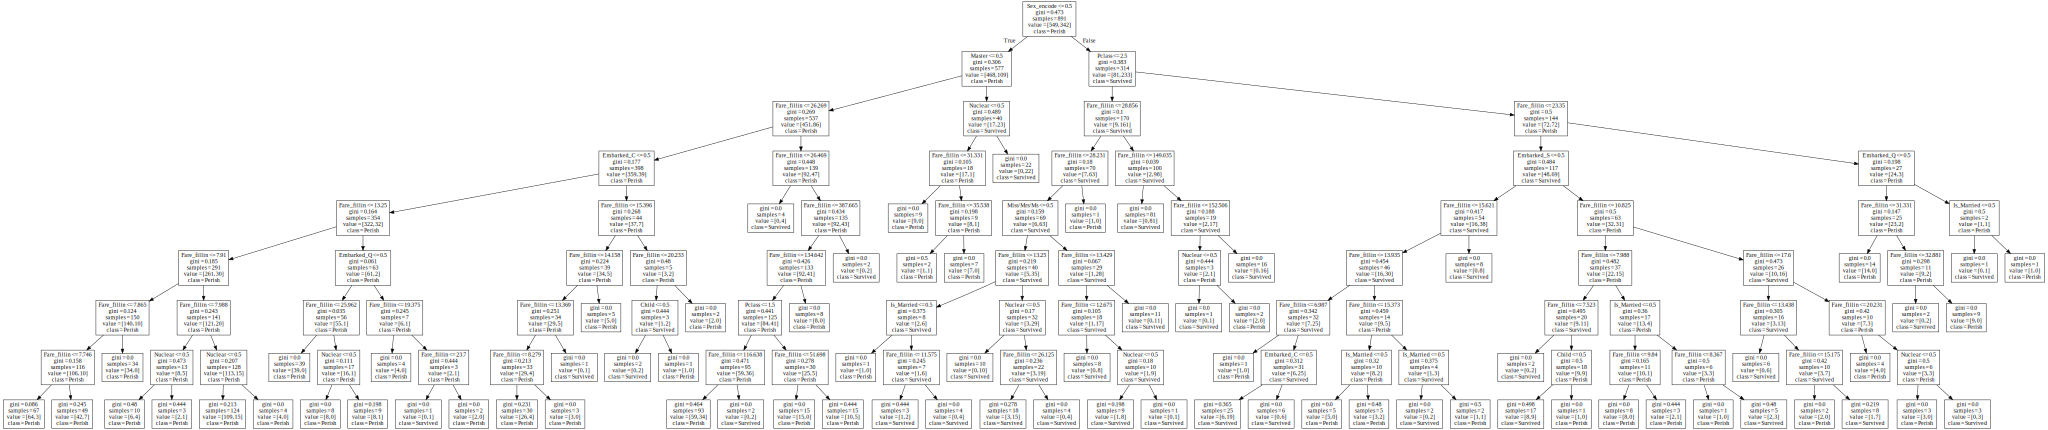

In [66]:
# Graphviz 가 error때문에 이 코드 기입
import os
os.environ['PATH'] = os.environ['PATH'] + os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

# graphviz 모듈을 가져옵니다.
import graphviz

# scikit-learn(줄여서 sklearn)의 tree 모듈에서 Decision Tree를 시각화 할 수 있는 export_graphviz를 가져옵니다.
from sklearn.tree import export_graphviz

# export_graphviz로 Decision Tree를 시각화합니다. 시각화 할 때는 다음의 옵션이 들어갑니다.
# 1) model. 시각화할 트리(Decision Tree) 입니다.
# 2) feature_names. 트리를 만들 때 사용한 feature들의 이름입니다.
# 3) class_names. 살았을 경우 시각화에서 어떻게 표현할 것인지(Survived), 반대로 죽었을 경우 시각화에서 어떻게 표현할 것인지(Perish)를 알려줍니다.
# 4) out_file. 시각화 겨롸를 저장할 파일명입니다. 이번에는 파일로 저장하지 않고 바로 쥬피터 노트북에 띄울 생각이므로 None을 주면 됩니다.
# 마지막으로 시각화한 결과를 dot_tree라는 이름의 변수에 저장합니다.
dot_tree = export_graphviz(model,
                           feature_names=feature_names,
                           class_names=["Perish", "Survived"],
                           out_file=None)

# graphviz에서 Source라는 기능을 통해 Decision Tree를 시각화합니다.
graphviz.Source(dot_tree)

## 6. Prediction (예측)

Decision Tree가 성공적으로 학습이 되었다면, 남은 것은 이 Decision Tree를 활용해 테스트 데이터에 있는 승객의 생존/사망 여부를 예측하는 것입니다. 예측은 ```model.predict```로 할 수 있으며, 이 때 test 데이터의 feature인 X_test가 필요합니다.

In [67]:
# fit이 끝났으면, predict라는 기능을 사용하여 생존 여부(Survived)를 예측합니다.
# predict의 실행이 끝나면 test 데이터의 생존 여부(Survived)를 반환하며, 이를 predictions라는 이름의 변수에 할당합니다.
predictions = model.predict(X_test)

# predictions 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(predictions.shape)

# predictions 변수에 값이 너무 많기 때문에, 상위 10개만 출력합니다.
predictions[0:10]

(418,)


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

## 7. Submit

Decision Tree의 fit과 predict 를 통해,  test 데이터에 있는 승객의 생존 여부(Survived)를 예측하였습니다. 이를 캐글 kaggle에 권장하는 제출(submission) 포멧에 맞게 정리한 뒤 파일로 저장.

In [68]:
# 캐글이 제공하는 제출 포멧(gender_submission.csv)을 읽어옵니다.
# PassengerId는 test 데이터와 동일하며, Survived는 남자일 경우 0, 여자는 1이 들어가 있습니다.
# 이를 submission 이라는 이름의 변수에 할당합니다.
submission = pd.read_csv("C:/Users/kyugs/Desktop/titanic/input/gender_submission.csv", index_col="PassengerId")

# submission 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(submission.shape)

# submission 데이터의 상위 5개를 띄웁니다.
submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [69]:
# 제출 포멧(submission)의 생존 여부(Survived) 컬럼에 우리의 예측값(predictions)를 집어넣습니다.
# 두 데이터 모두 길이가 418개로 동일하기 때문에, 등호(=)를 통해 쉽게 예측값을 넣을 수 있습니다.
submission["Survived"] = predictions

# submission 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(submission.shape)

# submission 데이터의 상위 5개를 띄웁니다.
submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [70]:
# 마지막으로 submission 변수에 들어간 값을 csv 형식의 데이터로 저장합니다.
submission.to_csv("C:/Users/kyugs/Desktop/titanic/input/submission.csv")

## 8. 확인
#### 제출 결과 상위 5 %(0.81818) 임을 확인 하였습니다.

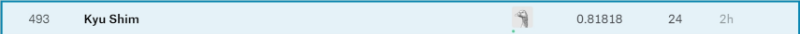

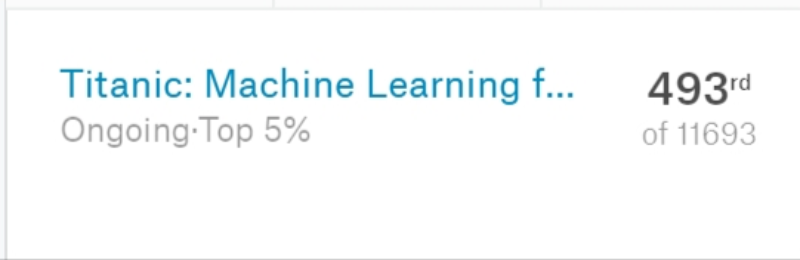